##Import package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load dataset

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Churn_Prediction/churn_prediction.xlsx")

#Data preprocessing

##Data Overview

In [ ]:
data.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,3.0,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,2.0,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [ ]:
data.shape

(5630, 20)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Missing values in Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder columns. All these columns are important for understanding customer behavior and business performance.
Given their significance, dropping these columns or the rows with missing values would result in a loss of valuable information.
Therefore, the appropriate approach is to impute the missing values to preserve the completeness and maintain the quality of the analysis.

##Missing values

<Axes: >

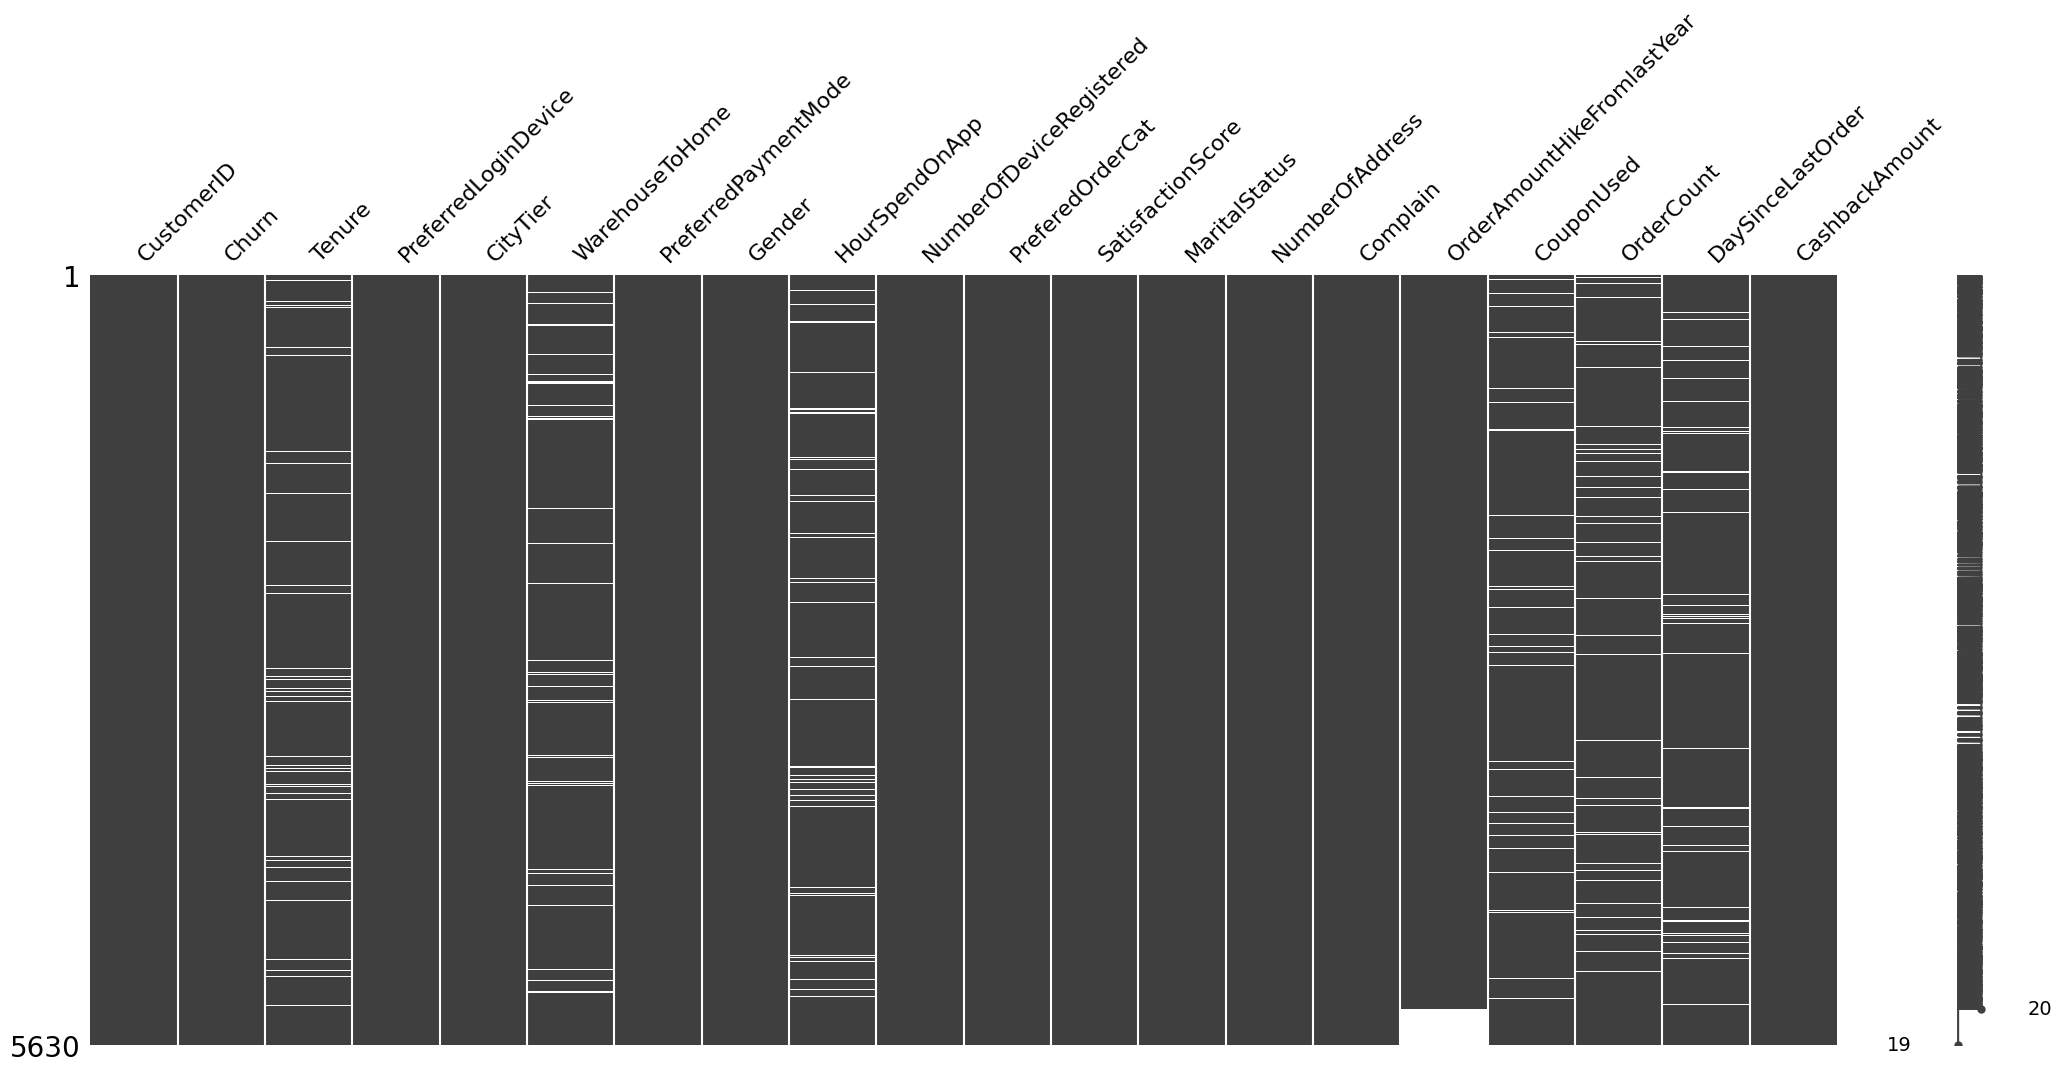

In [ ]:
import missingno as msno

msno.matrix(data)

In [ ]:
for col in ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']:
          data[col].fillna(data[col].median(), inplace=True)

<ipython-input-10-64be123d212f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


We impute the missing values using the median, as all columns are numeric and the median is less sensitive to outliers compared to the mean.

In [ ]:
data.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


Now, the table has no missing values and the data is complete.

##Duplicate values

In [ ]:
data.duplicated().any()

False

##Univariate Analysis

### Numerical Columns

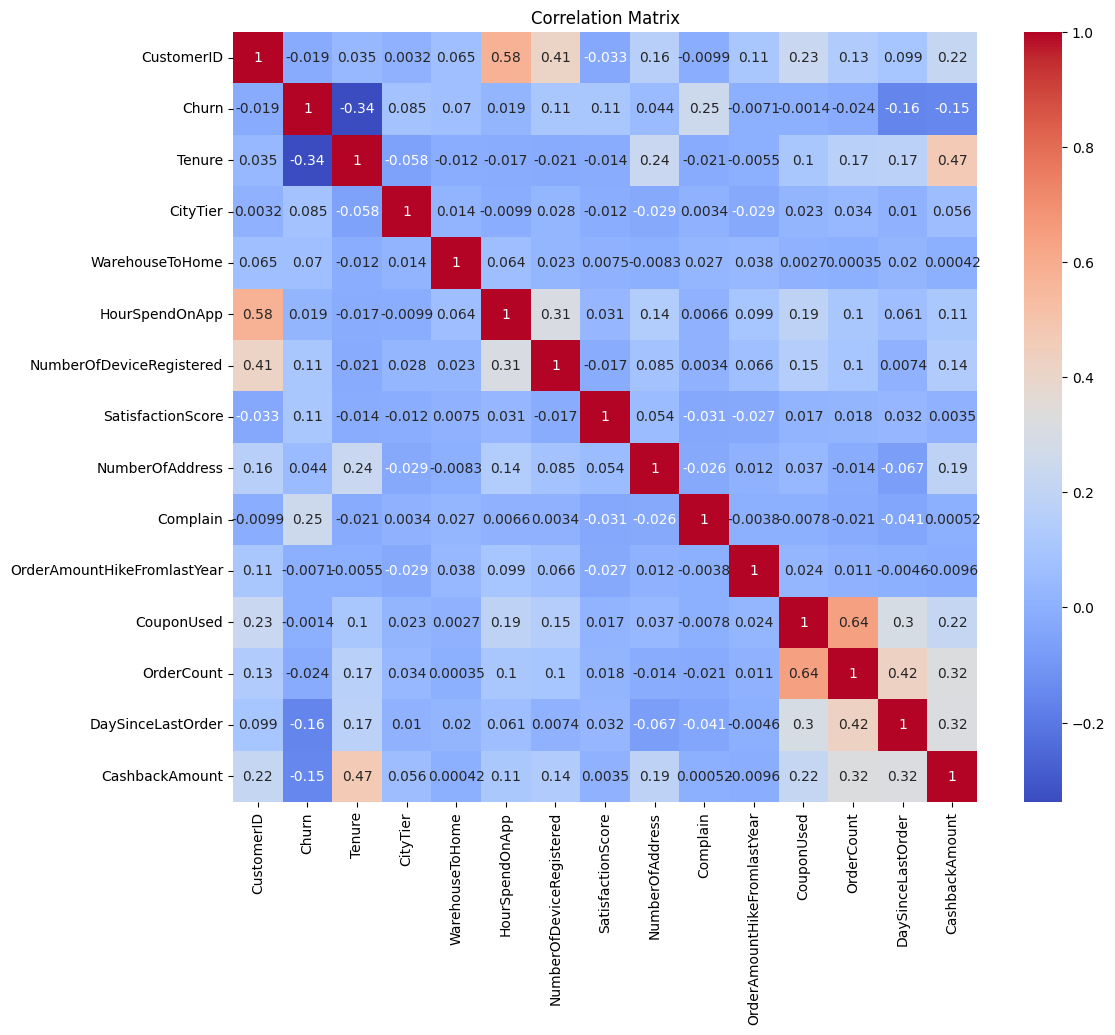

In [ ]:
#correlation matrix
numeric_cols = data.select_dtypes(include=[np.number])

cormatrix= numeric_cols.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cormatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Factors affect Churn:

**Tenure - Churn:** Strong negative correlation(-0.34):
=> The longer a customer has been engaged, the less likely they are to churn.

**Complain - Churn:** Light positive correlation (0.25):
=> Customers who filed a complaint are more likely to churn.

**DaySinceLastOrder - Churn:** Light negative correlation (-0.16):
=> The more days since the customer's last purchase, the higher the likelihood of churn.

**CashbackAmount - Churn:** Light negative correlation (-0.15):
=> Customers who received more cashback are less likely to churn.

Other notable correlations:

**OrderCount and CouponUsed:** Strong correlation (0.64)
=> Customers who use more discount coupons also tend to place more orders.

**DaySinceLastOrder and OrderCount:** Strong correlation (0.42)
=> High-value customers at risk of churn since their last purchase was a long time ago.

**OrderCount/CouponUsed and CashbackAmount:** Fairly strong correlation (0.32 and 0.22)
=> More orders/coupons lead to a higher total cashback received.

In [ ]:
num_cols = numeric_cols.columns.tolist()
num_cols.remove('CustomerID')

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00


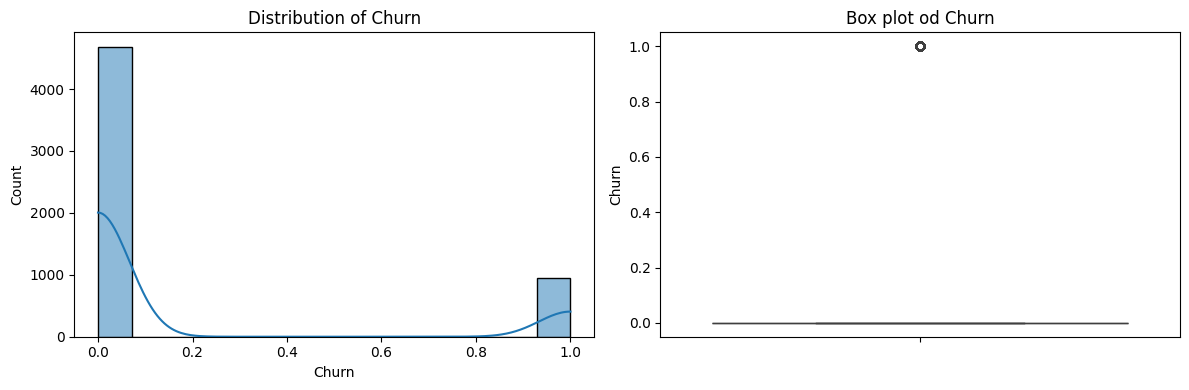

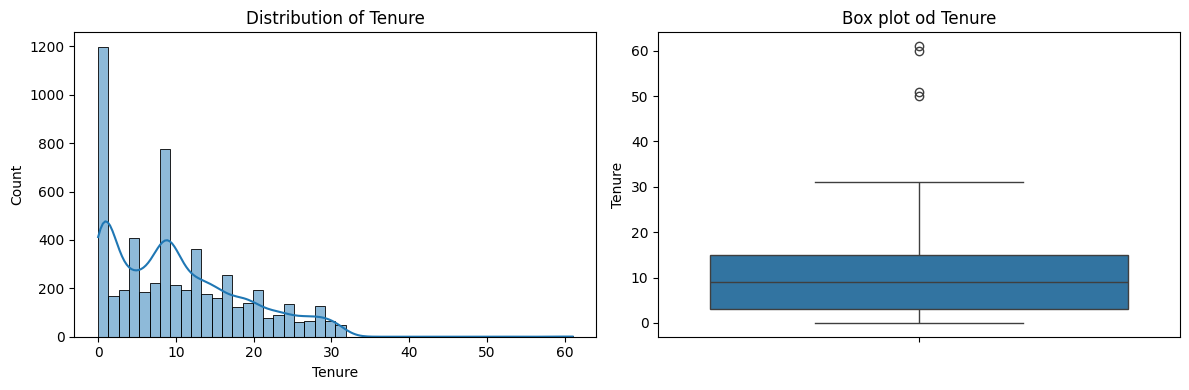

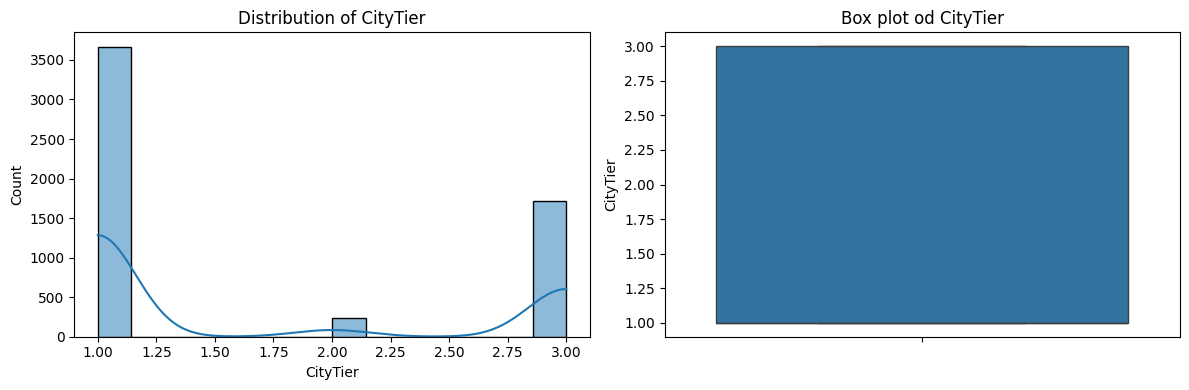

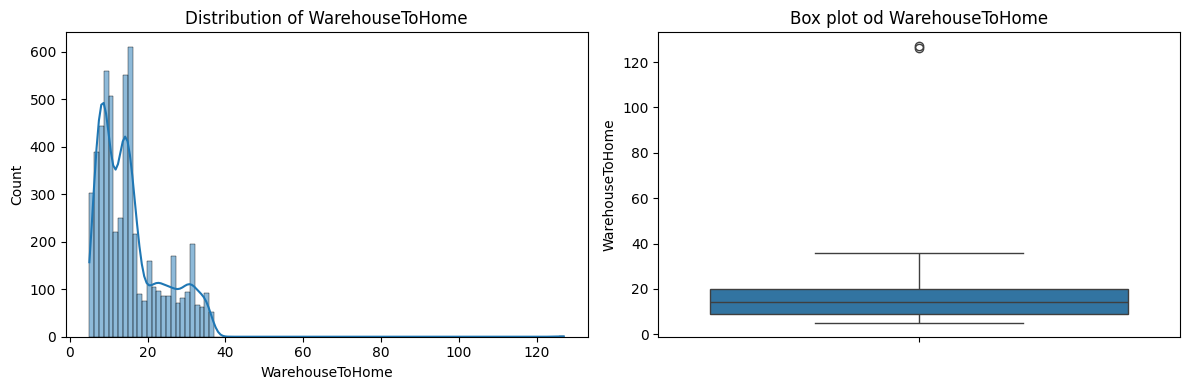

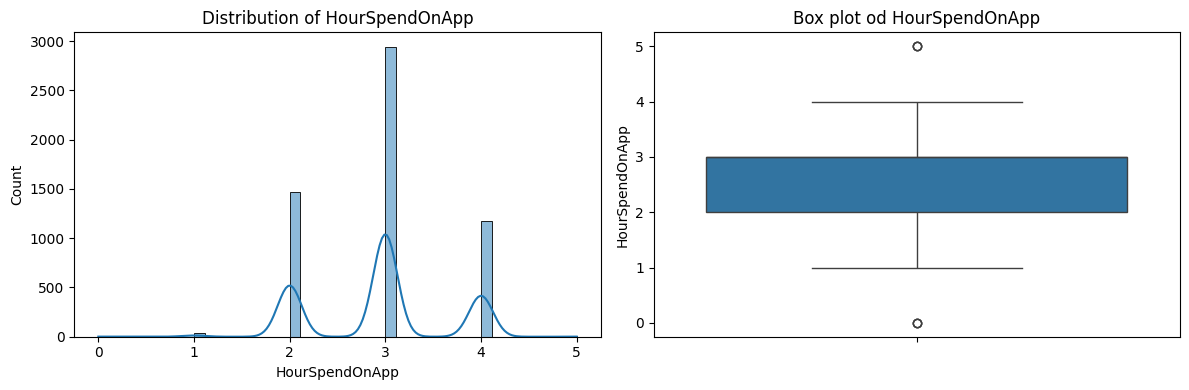

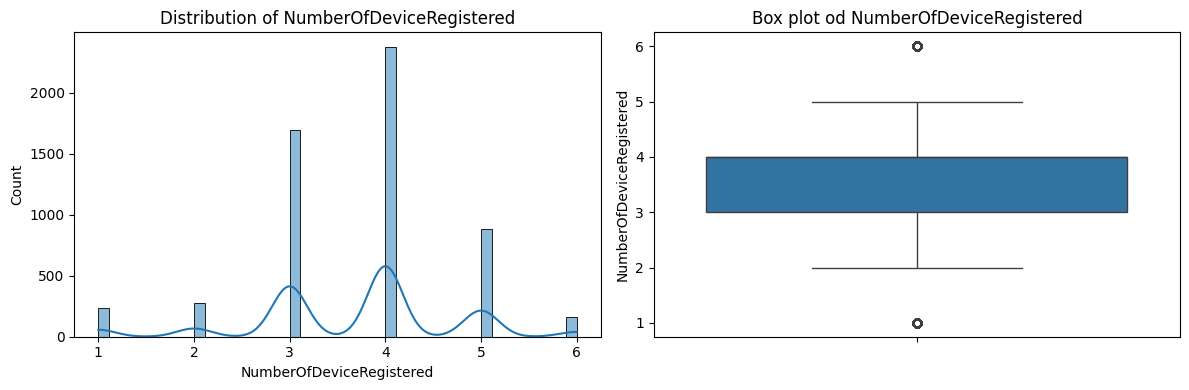

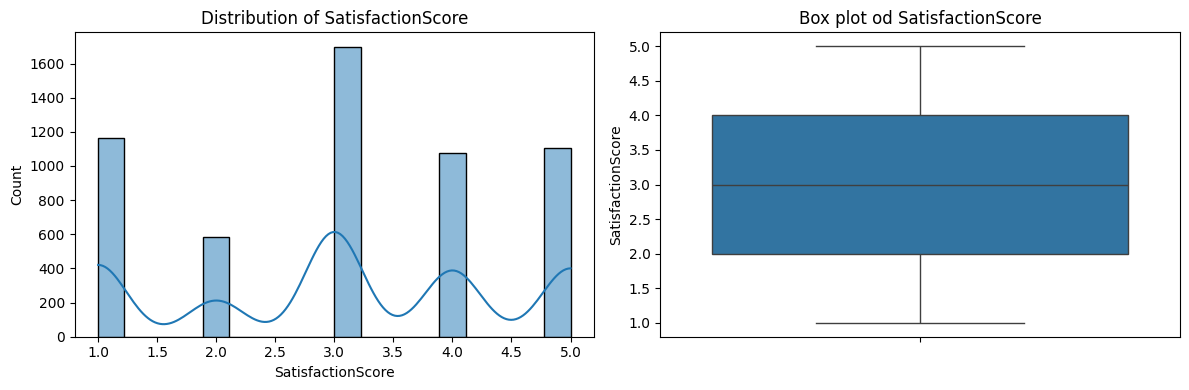

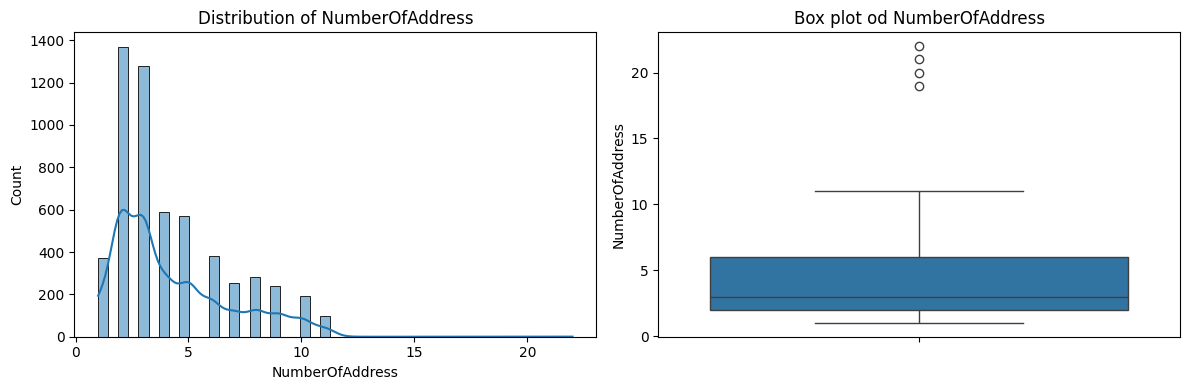

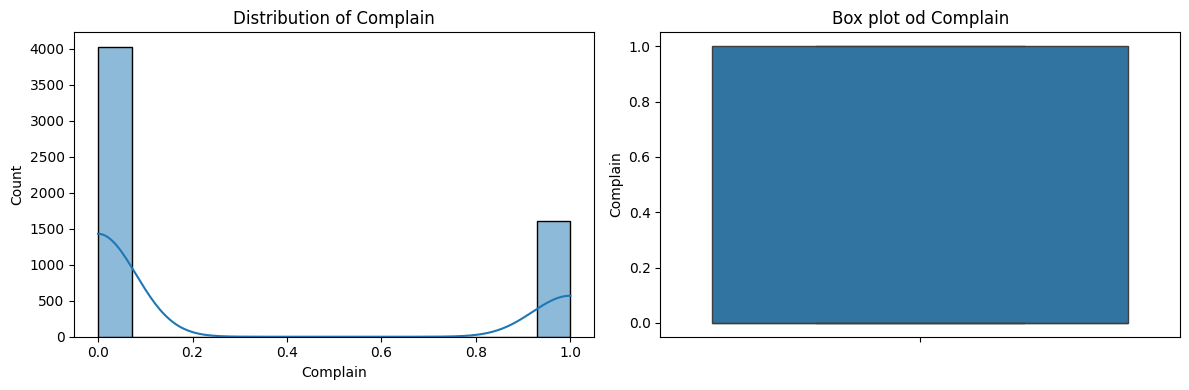

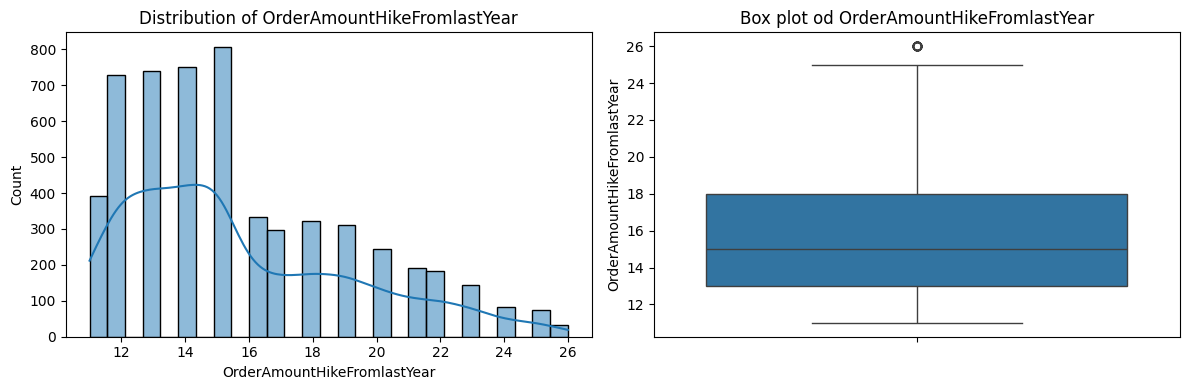

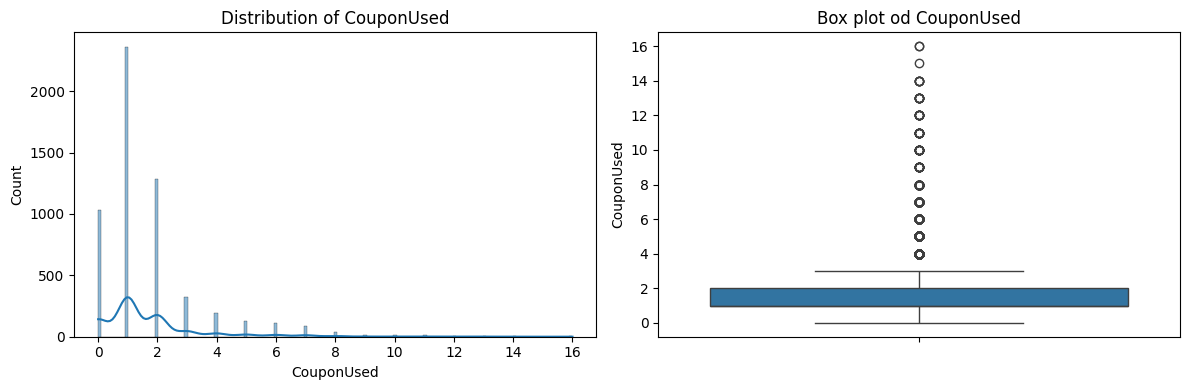

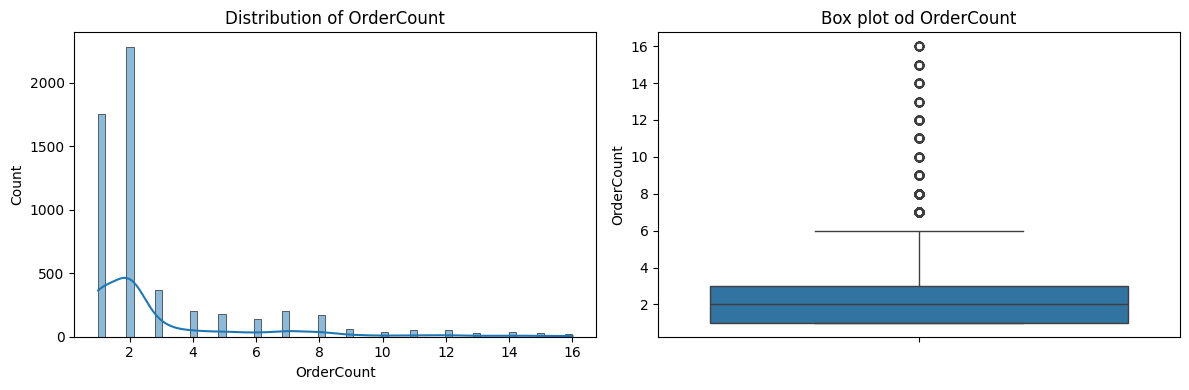

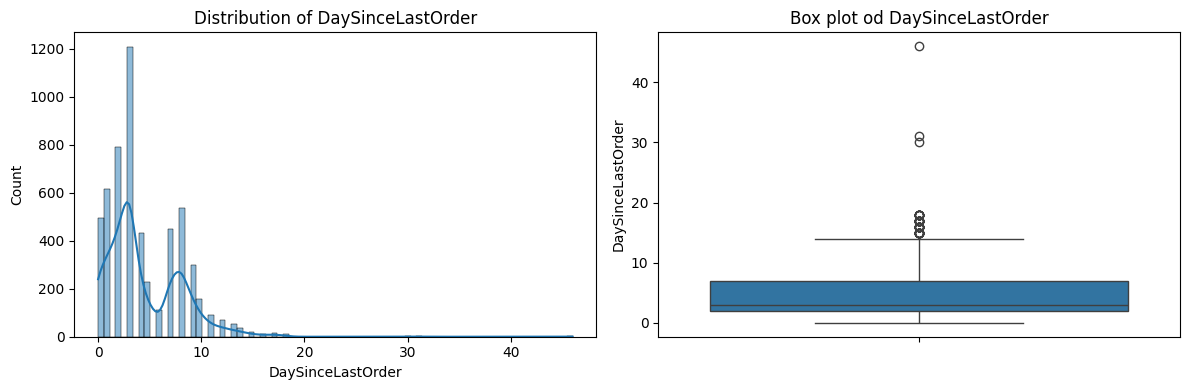

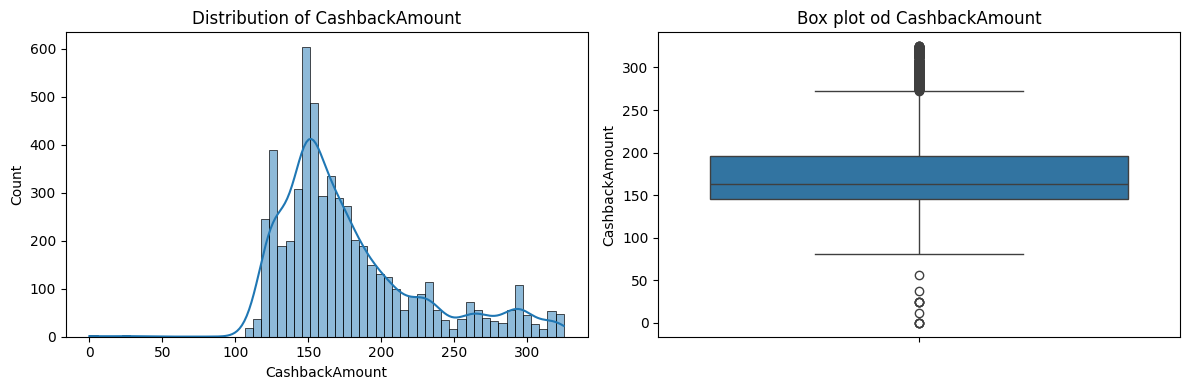

In [ ]:
for col in num_cols:
  fig, axes= plt.subplots(1, 2, figsize=(12,4))

  sns.histplot(data[col], kde=True, ax=axes[0])
  axes[0].set_title(f'Distribution of {col}')

  sns.boxplot(data[col], ax=axes[1])
  axes[1].set_title(f'Box plot od {col}')

  plt.tight_layout()
  plt.show()

###Categorical Columns

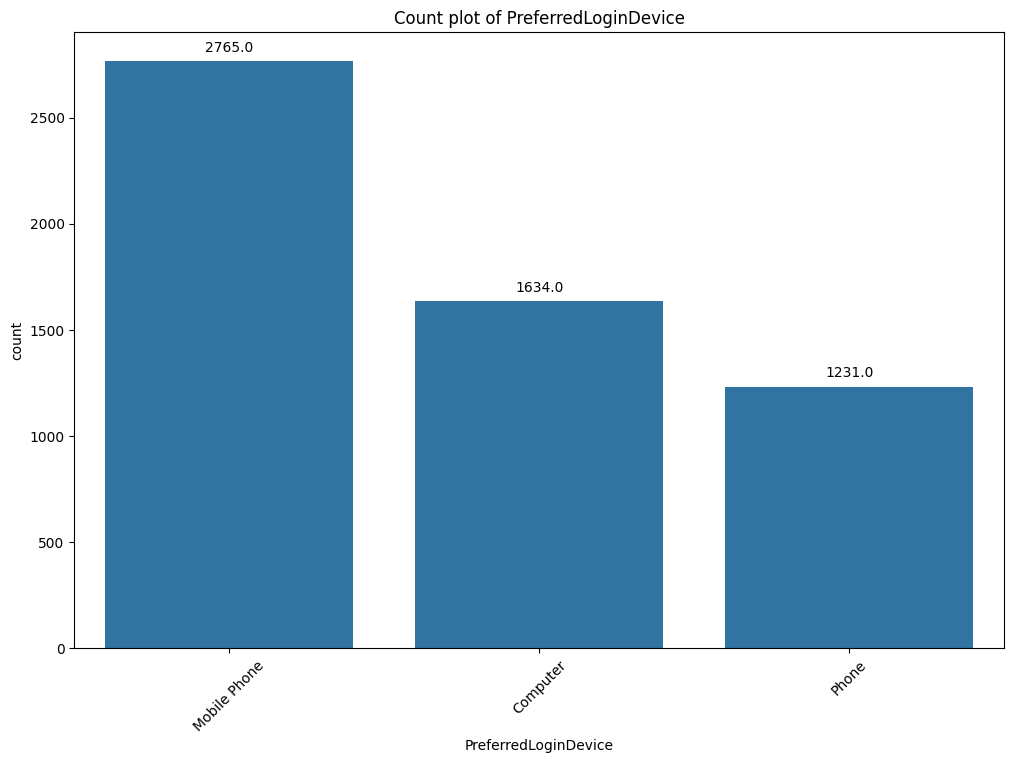

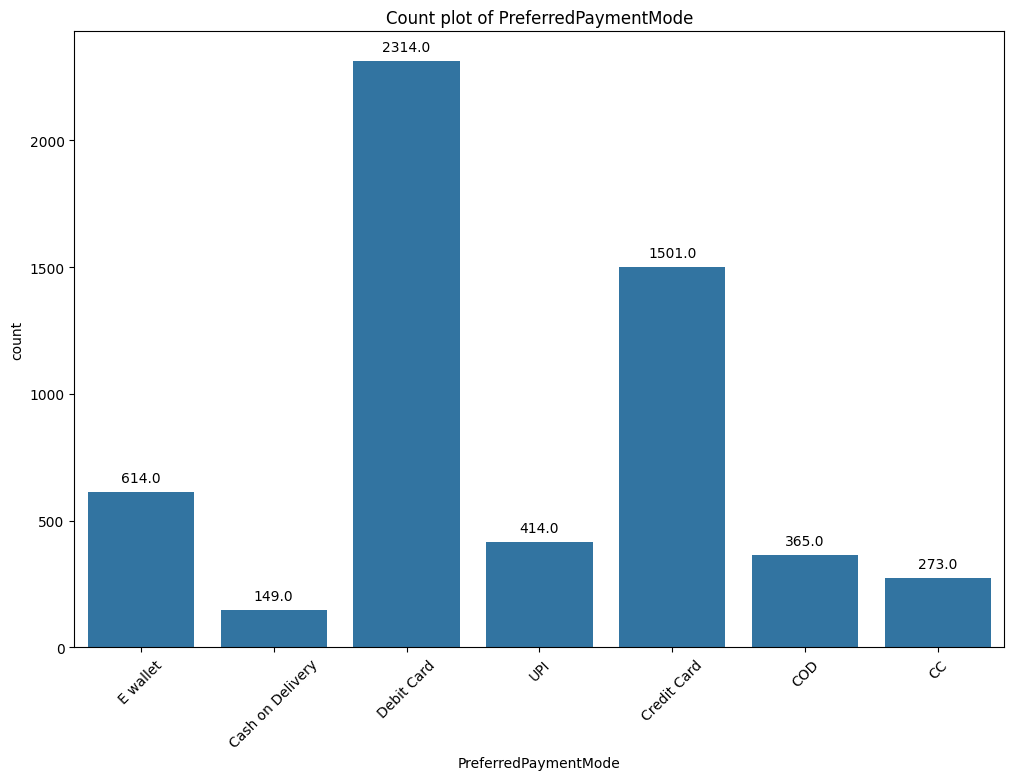

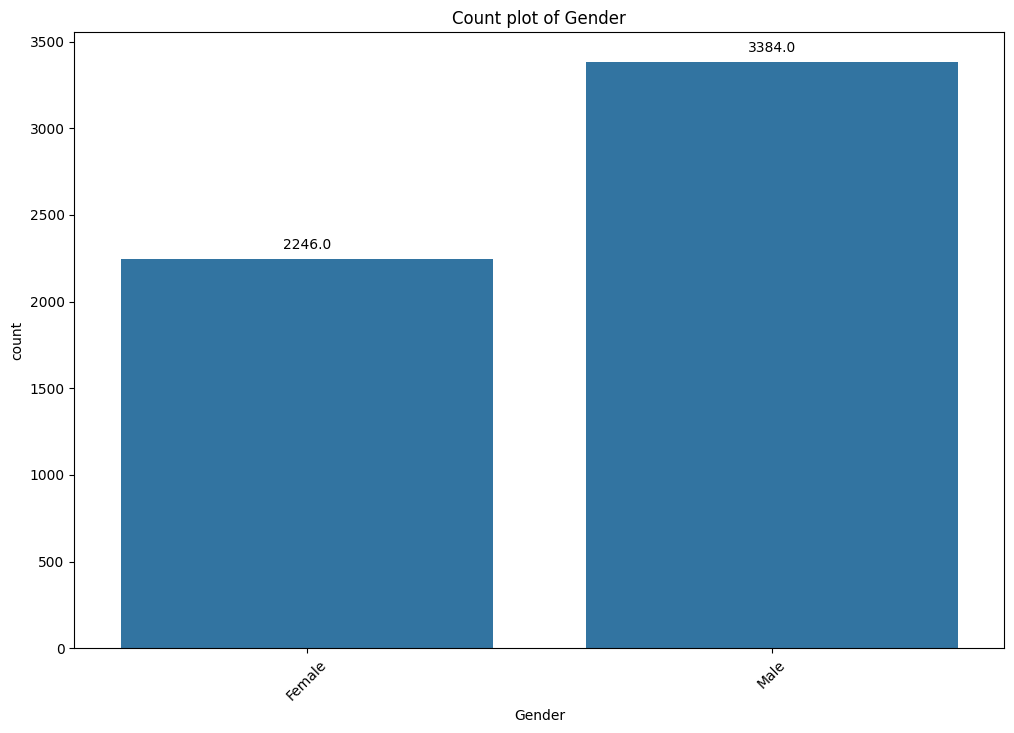

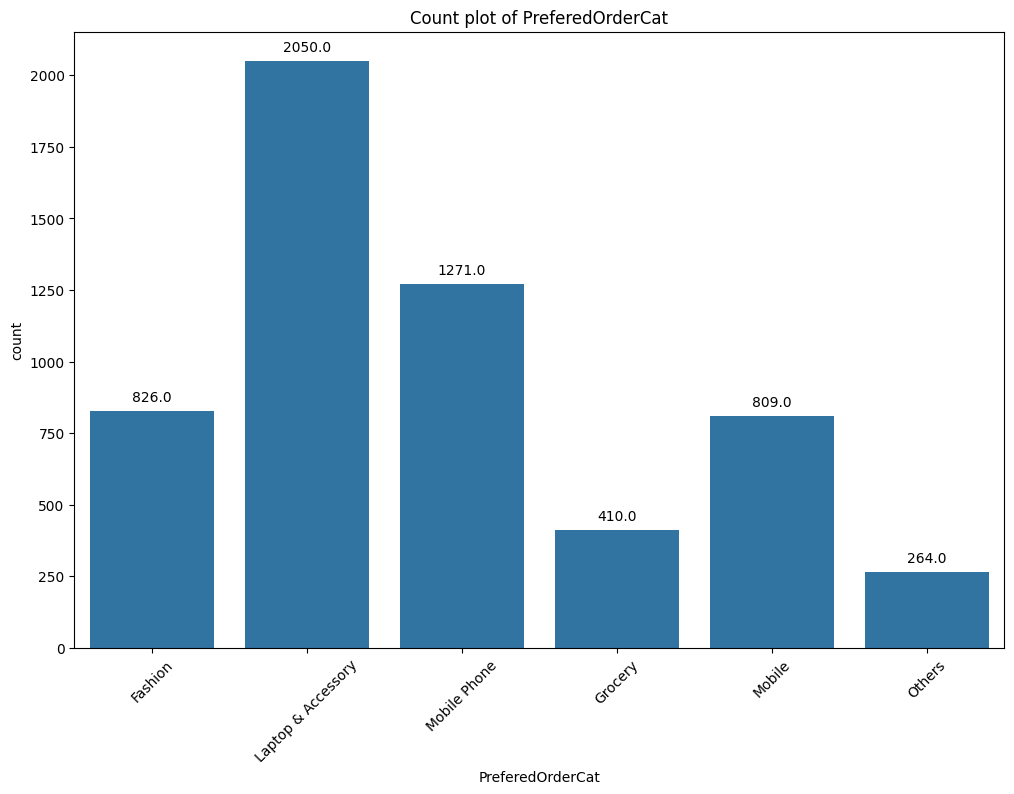

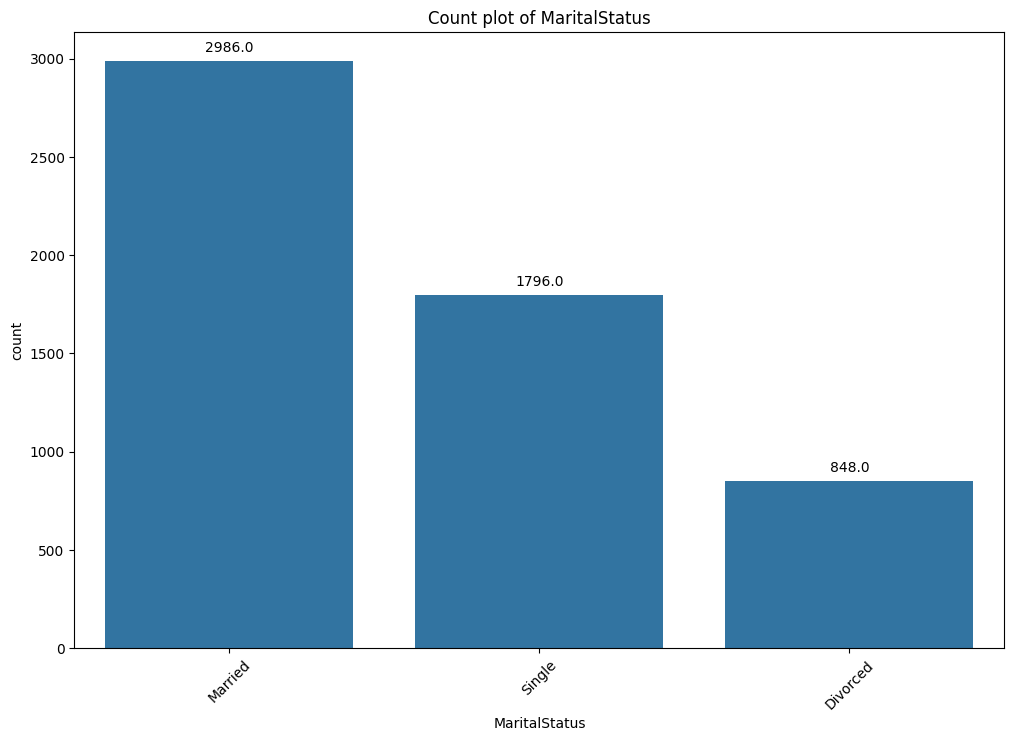

In [ ]:
categ_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categ_cols:
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=data, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#Model for predicting churned users.

##Encoding

In [ ]:
df_encoded = pd.get_dummies(data, columns=categ_cols, drop_first=True).astype(int)
df_encoded

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20,3,7,4,4,5,3,0,...,1,0,0,0,0,0,0,0,1,0
1,52942,0,13,1,9,4,4,3,2,0,...,0,0,0,0,0,0,0,0,0,1
2,52972,0,16,3,7,3,4,3,3,0,...,0,0,1,0,1,0,0,0,0,0
3,53125,0,5,1,16,3,4,4,3,0,...,0,0,1,0,0,0,0,0,1,0
4,53367,0,9,1,28,3,4,2,3,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55535,0,61,3,28,4,4,1,6,1,...,0,0,0,1,0,0,0,0,1,0
5626,55538,0,23,1,9,3,4,1,5,0,...,0,0,1,0,0,0,0,1,1,0
5627,55562,0,29,2,33,4,2,4,6,1,...,0,1,1,0,0,0,0,1,1,0
5628,55598,0,13,1,16,3,4,1,4,0,...,0,0,1,0,0,0,0,1,0,1


Since each column has only a few unique categorical values, we use one-hot encoding.

##Apply model

###Split/Train/Validate/Test set

In [ ]:
from sklearn.model_selection import train_test_split

x=df_encoded.drop(['CustomerID', 'Churn'], axis=1)
y=df_encoded['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 3941
Number data of test set: 1689


###Apply Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#train model
rf= RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)
rf.fit(x_train, y_train)

y_train_predict= rf.predict(x_train)
y_test_predict= rf.predict(x_test)

In [ ]:
print(f"Accuracy on train set: {rf.score(x_train, y_train)}")
print(f"Accuracy on test set: {rf.score(x_test, y_test)}")

Accuracy on train set: 1.0
Accuracy on test set: 0.9413854351687388


- The training accuracy is 100% => model fits perfectly on the training data.
- The testing accuracy is high (94.14%)=> model generalizes well to unseen data.
- There is no severe overfitting as the gap between training and testing accuracy is not too large.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_predict)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_predict)
print(balanced_accuracy_train, balanced_accuracy_test)

1.0 0.8568149371887489


- The balanced accuracy on the test set is 85.68% => model performs well even if the classes are imbalanced


###Feature Important

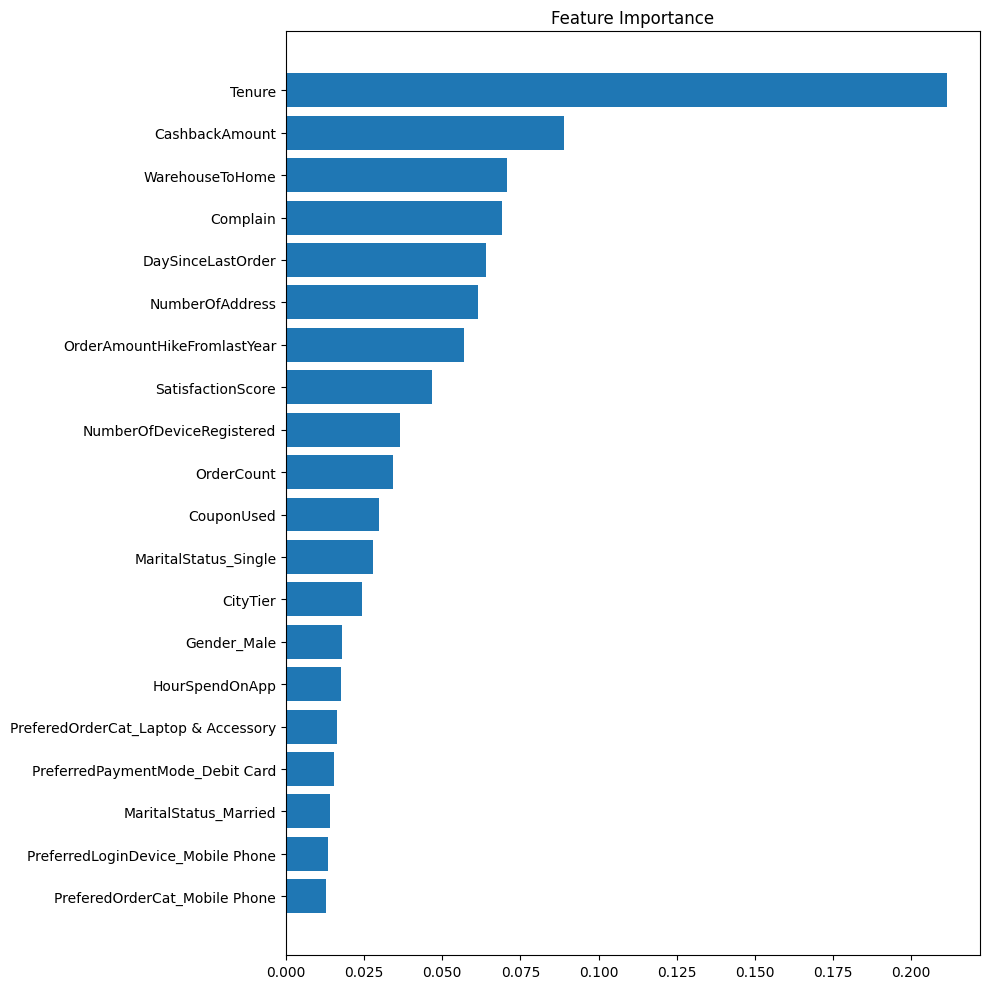

In [ ]:
#create dictionary
feats = {}  # dictionary: feature_name -> feature_importance

for feature, importance in zip(x_test.columns, rf.feature_importances_):
    feats[feature] = importance

#convert into DataFrame
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

#sort ascending
importances = importances.sort_values(by='Gini-importance', ascending=True).reset_index()

#plot diagram
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])
plt.title('Feature Importance')

plt.tight_layout()
plt.show()


Tenure is the strongest factor influencing churn (~0.20), followed by CashbackAmount and WarehouseToHome(likely related to delivery speed)

**Top 5 factors that influence churn rate:**
1. Tenure
2. CashbackAmount
3. WarehouseToHome
4. Complain
5. DaySinceLastOrder

###Top 5 factors analysis
Patterns/behavior of churned users and suggestions to reduce churned users.

In [ ]:
churned_users_count = data[data['Churn'] == 1]['CustomerID'].count()
churned_users_count

948

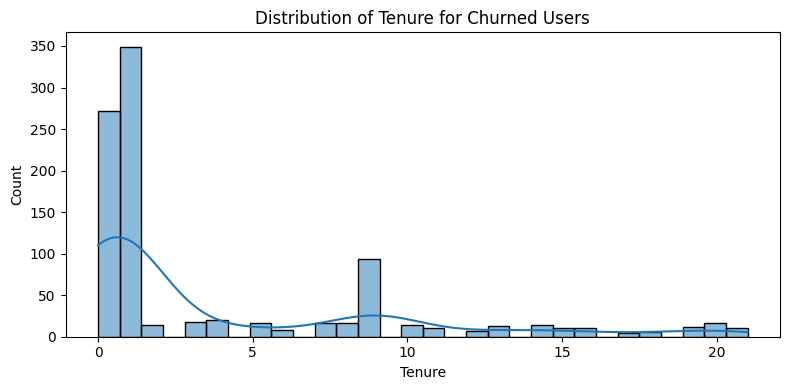

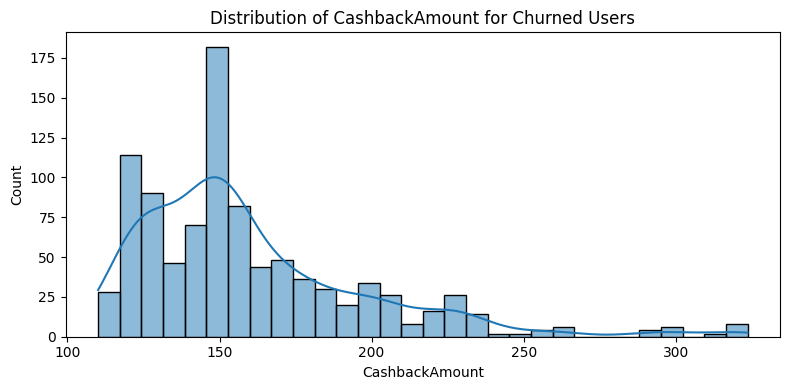

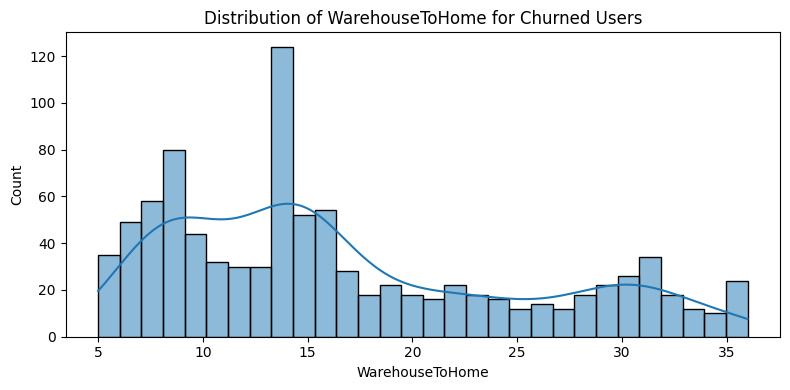

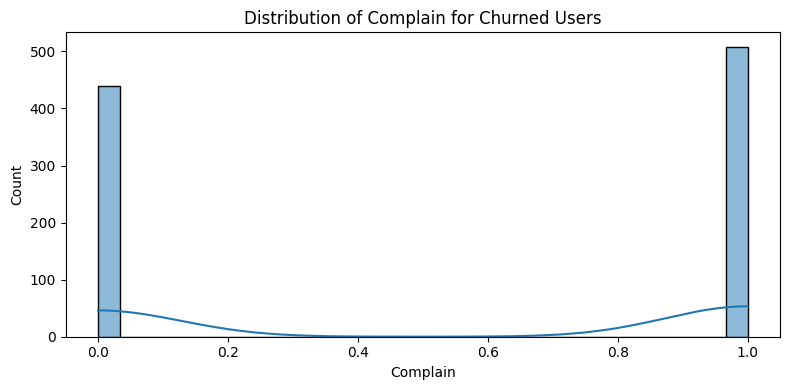

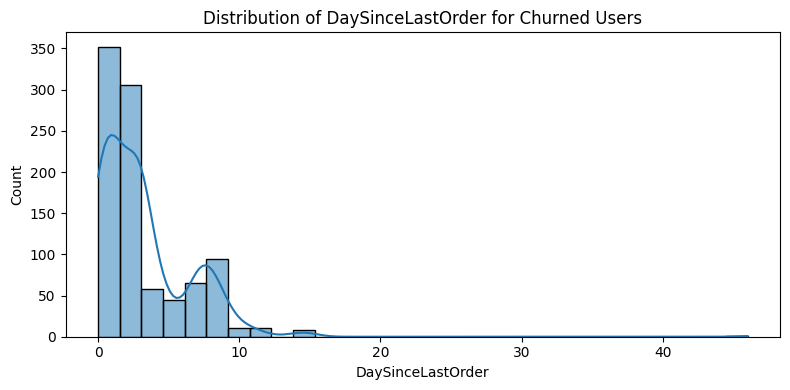

In [ ]:
top5_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder']

churned_users = data[data['Churn'] == 1]

# EDA for each feature
for feature in top5_features:
  plt.figure(figsize=(8,4))

  sns.histplot(data=churned_users[feature], kde=True, bins=30)
  plt.title(f'Distribution of {feature} for Churned Users')

  plt.tight_layout()
  plt.show()

**Tenure Aspect:**

- Nearly 350 churned users had a tenure of less than 2 months.
- A small number of users churn even after 9 months, but this group is negligible compared to early churn.

Action Plan:
- Implement a strong onboarding experience within the first 60 days.
- Introduce welcome bonuses, and early engagement incentives.
- Develop loyalty programs targeting users who pass the 6-month and 12-month marks to reinforce long-term retention.

**CashbackAmount Aspect:**
- Majority of churned users had CashbackAmount between 120–200.
- Higher cashback amounts (>250) are associated with lower churn.

Action Plan:
- Increase cashback incentives for users with low spend or initial transactions.
- Focus on the low cashback users with better loyalty program/tiers
- Design loyalty tiers where cashback percentages increase over time to encourage longer retention.

**WarehouseToHome Aspect:**
- Common distance ranges from 5-16km (the highest point is 14km)
- The range of distance for churned users is from 5-35km
- Churn is not limited to customers far from the warehouse but delivery time and customer service.

Action Plan:
- Improve delivery speed and communication, especially for nearby users.
- Implement real-time delivery tracking and proactive communication during delays.
- Conduct customer satisfaction surveys to identify pain points in the delivery process.

**Complain Aspect:**
- Churn is higher among users who complained.
- However, silent churn (no complaints) is also significant.

Action Plan:
- Strengthen customer service and speed up complaint resolution.
- Implement proactive customer feedback surveys to detect dissatisfaction early.

**DaySinceLastOrder Aspect:**
- Recent buyers (within 10 days) still churn, suggesting post-purchase experience issues.
- Lack of activity beyond 10 days is an early indicator of churn.

Action Plan:
- Enhance during and post-purchase support and engagement (delivery, feedback, tracking, feedback, refund)
- Implement reactivation campaigns targeting users inactive for over 7 days.

##Model evaluation - Fine tuning






Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#param_grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=2
)

#Fit GridSearchCV in training set
grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

#Apply best model to test set
best_clf = grid_search.best_estimator_
test_accuracy = best_clf.score(x_test, y_test)

print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test set accuracy with best parameters: 0.9526


In [ ]:
y_test_pred = best_clf.predict(x_test)
balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
print(f"Balanced Test Accuracy: {balanced_acc:.4f}")

Balanced Test Accuracy: 0.8883


After hyperparameter tuning, the model was optimized with the following parameters:
**{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.**

As a result, the fine-tuned model achieved:

- **Test set accuracy: 0.9526**
- **Balanced test accuracy: 0.8883**

Both the overall accuracy and the balanced accuracy are higher compared to the baseline model, indicating that hyperparameter tuning has significantly improved the model's performance.

#Model for churned users segmentation





In [ ]:
churned_users = data[data['Churn'] == 1]

In [ ]:
churned_users

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,55053,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,50768,1,9.0,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,52238,1,9.0,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,52834,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,53286,1,21.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Others,4,Single,9,1,15.0,6.0,14.0,9.0,317.46
5494,53604,1,9.0,Mobile Phone,3,9.0,E wallet,Female,4.0,6,Others,4,Single,4,1,15.0,1.0,2.0,12.0,313.24
5531,54206,1,5.0,Mobile Phone,1,19.0,Cash on Delivery,Female,3.0,4,Others,3,Married,3,0,15.0,2.0,16.0,9.0,320.45
5571,54756,1,21.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Others,4,Single,9,1,15.0,8.0,14.0,9.0,317.46


##Encoding

In [ ]:
churned_encode= pd.get_dummies(churned_users, columns=categ_cols, drop_first=True).astype(int)
churned_encode

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
7,53583,1,1,1,17,4,5,4,3,1,...,0,0,0,0,0,0,1,0,0,1
24,55053,1,1,1,17,4,5,4,3,1,...,0,0,0,0,0,0,1,0,0,1
40,50768,1,9,1,16,3,4,4,2,1,...,0,0,0,0,0,0,1,0,0,1
58,52238,1,9,1,16,3,4,4,2,1,...,0,0,0,0,0,0,1,0,0,1
68,52834,1,1,1,14,4,6,3,3,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,53286,1,21,1,9,3,4,4,9,1,...,0,0,1,0,0,0,0,1,0,1
5494,53604,1,9,3,9,4,6,4,4,1,...,1,0,0,0,0,0,0,1,0,1
5531,54206,1,5,1,19,3,4,3,3,0,...,0,0,0,0,0,0,0,1,1,0
5571,54756,1,21,1,9,3,4,4,9,1,...,0,0,1,0,0,0,0,1,0,1


##Dimension Reduce

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(churned_encode)
PCA_ds = pd.DataFrame(pca.transform(churned_encode), columns=(["col1","col2", "col3"]))
PCA_ds

,col1,col2,col3
0,836.297076,-22.688771,1.039028
1,2306.264694,-32.369642,0.517703
2,-1978.808375,-28.871523,0.743145
3,-508.840757,-38.552394,0.221820
4,87.589106,24.319276,-2.144137
...,...,...,...
943,540.445132,154.518988,-10.998011
944,858.409042,147.498973,-9.789295
945,1460.448518,150.804250,-0.000754
946,2010.413438,144.889488,-11.573214


In [ ]:
pca.explained_variance_ratio_

array([9.99436927e-01, 5.10360830e-04, 2.55842923e-05])

##Find K value

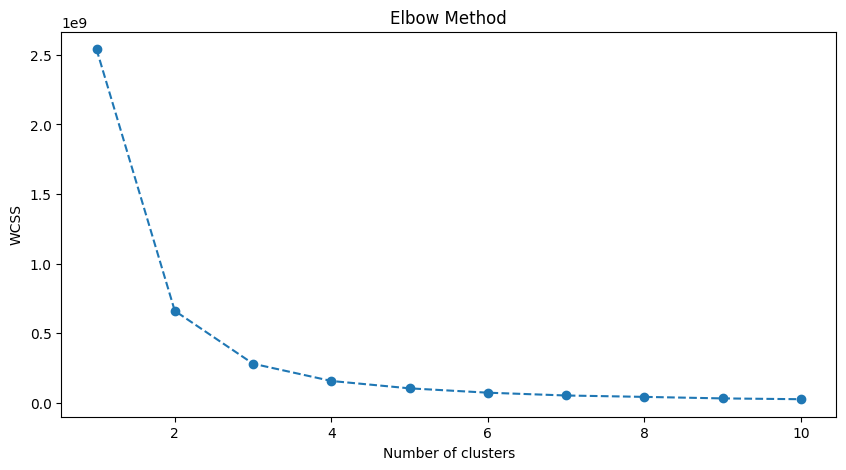

In [ ]:
from sklearn.cluster import KMeans

ss = []
max_clusters = 10

# Run KMeans with cluster from 1 to 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_ds)
    ss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


=> choose k=3

##Apply K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_ds)

PCA_ds['clusters']=predicted_labels
churned_encode['clusters']=predicted_labels
churned_encode

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,clusters
7,53583,1,1,1,17,4,5,4,3,1,...,0,0,0,0,0,1,0,0,1,0
24,55053,1,1,1,17,4,5,4,3,1,...,0,0,0,0,0,1,0,0,1,2
40,50768,1,9,1,16,3,4,4,2,1,...,0,0,0,0,0,1,0,0,1,1
58,52238,1,9,1,16,3,4,4,2,1,...,0,0,0,0,0,1,0,0,1,0
68,52834,1,1,1,14,4,6,3,3,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,53286,1,21,1,9,3,4,4,9,1,...,0,1,0,0,0,0,1,0,1,0
5494,53604,1,9,3,9,4,6,4,4,1,...,0,0,0,0,0,0,1,0,1,0
5531,54206,1,5,1,19,3,4,3,3,0,...,0,0,0,0,0,0,1,1,0,2
5571,54756,1,21,1,9,3,4,4,9,1,...,0,1,0,0,0,0,1,0,1,2


##Evaluate Model

###Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_ds, predicted_labels)
print(sil_score)

0.5933411786296775


The Silhouette Score of 0.5933 indicates that the clustering structure is fairly strong, with reasonably well-separated and cohesive clusters.

###Feature Important

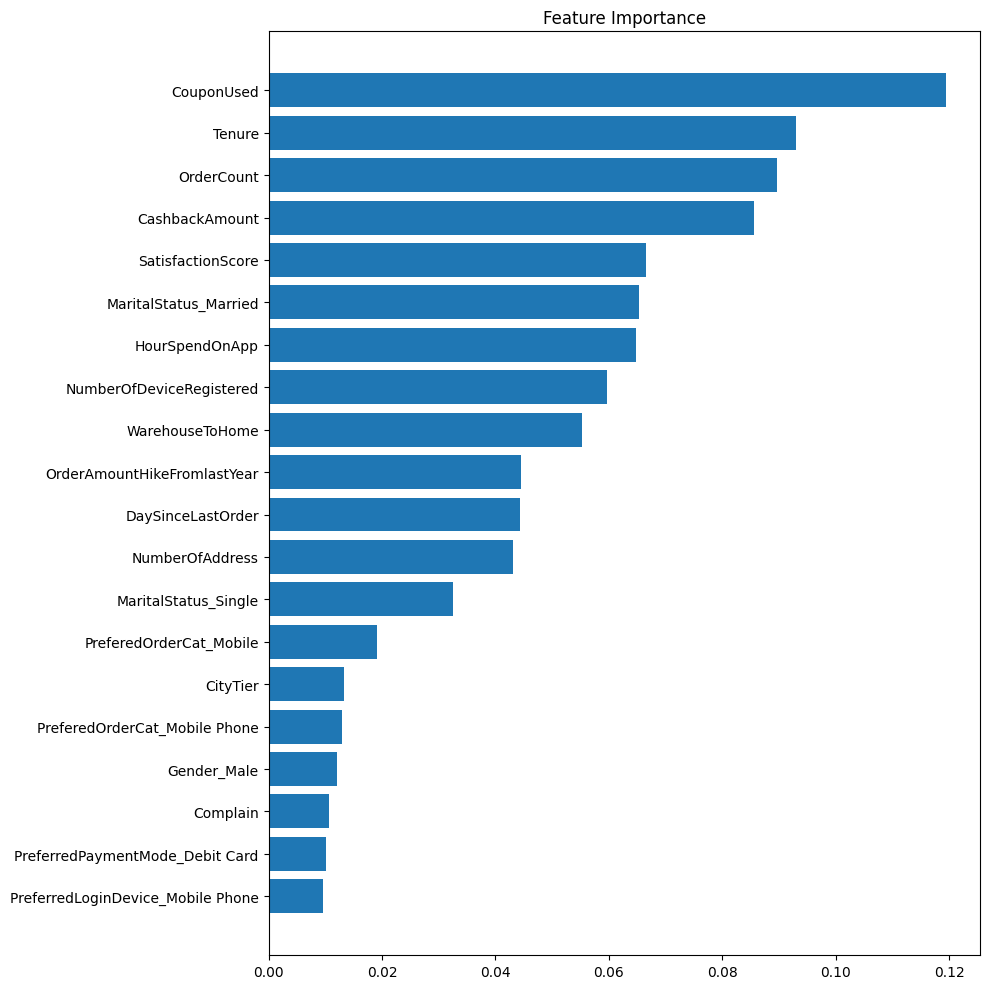

In [ ]:
x = churned_encode.drop(columns=['clusters', 'CustomerID'])
y = churned_encode['clusters']

#Train Random Forest
rf_cluster = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)
rf_cluster.fit(x, y)

#Feature Importance
feats = {}

for feature, importance in zip(x.columns, rf_cluster.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True).reset_index()

#Plot Feature Importance
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

CouponUsed is the strongest factor influencing churn (~0.12), followed by Tenure, OrderCount and CashbackAmount

**Top 4 factors that influence churn rate:**

1. CouponUsed
2. Tenure
3. OrderCount
4. CashbackAmount


###Top 4 Factors Analysis

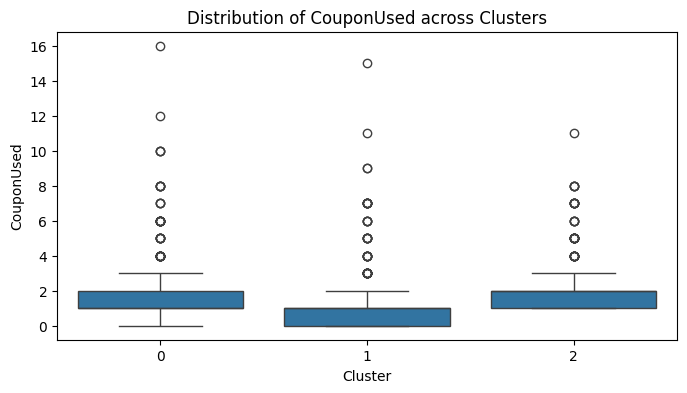

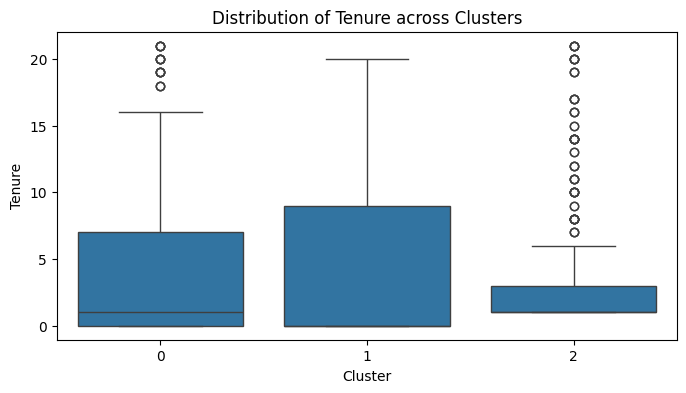

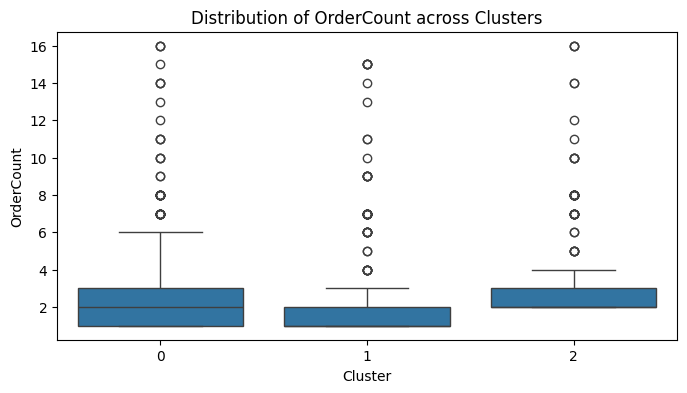

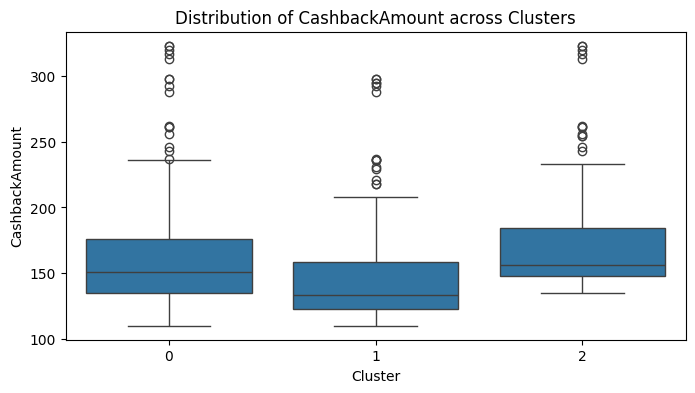

In [ ]:
top4_churn = ['CouponUsed', 'Tenure', 'OrderCount', 'CashbackAmount']

for feature in top4_churn:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='clusters', y=feature, data=churned_encode)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

**CouponUsed Aspect:**

- Cluster 1: Median coupon usage is the lowest (near 0). Most customers rarely use discount coupons => customers less dependent on promotions.

- Clusters 0 and 2: Higher median coupon usage. More outliers (some customers used more than 10 coupons) => more likely to use coupons

Action Plan:
- Low coupon usage (Cluster 1): Focus on non-price benefits (service quality, loyalty perks). Communicate brand value instead of promotions.
- Higher coupon usage (Clusters 0 and 2): Use targeted discount campaigns (limited-time, new-user discounts) to promote purchases. Offer graduated discount plans (e.g., 10% for first order, 5% for next)


**Tenure Aspect:**

- Cluster 0: Low median (1–2 months). Mostly newer customers, a few longer-term outliers => new customers

- Cluster 1: Widest range tenure (0–9 months), with many customers having stayed for 20 months => loyal customers with long engagement

- Cluster 2: Low median (1–2 months).
Majority are very new customers (2-3 months) => extremely new customers

Action Plan:
- Cluster 1: Launch loyalty reward programs (points, cashback after X months). Send personalized thank-you emails or gifts after (6 months or 12 months), early access to new products, premium service.
- Cluster 0 and 2: Set up welcome series campaigns (email or in-app messages). Offer progressive incentives (e.g., small discounts after first purchase, bigger rewards after second or third), Educate about long-term value through onboarding content.

**OrderCount Aspect:**

- Cluster 1: Has the lowest median number of orders (~1 order). Narrow distribution, most customers placed only 1–2 orders => very few purchases

- Clusters 0 and 2: Higher medians (2–3 orders). Wider spread for cluster 0, some customers placed up to 10–15 orders => more active, with more frequent orders

Action Plan:
- Cluster 1: Reactivation campaigns offers easy reorder options. Highlight new products or bundles to draw interest. Use loyalty challenges ("Order twice this month, get a bonus").
- Clusters 0 and 2: Reward consistency: encourage repeat orders via loyalty points. Recommend related products, bundles.

**CashbackAmount Aspect:**

- Cluster 1: Lower median cashback amount compared to other clusters. Cashback mostly stays around 120–150 units.

- Clusters 0 and 2: Higher medians (~160–170 units). Wider distribution and more customers received higher cashback rewards (>250 units).

Action Plan:
- Cluster 1: Offer targeted cashback promotions to re-engage. Design first-purchase cashback offers to motivate another order.
- Clusters 0 and 2: Maintain engagement through progressive rewards and celebrate loyalty (Top 10% cashback earners)